In [46]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.model_selection import train_test_split

In [24]:

np.random.seed(0)
n_points_per_cluster = 300
C1 = [-6, -2] + 0.7 * np.random.randn( n_points_per_cluster, 2 )
C2 = [-2, 2] + 0.3 * np.random.randn( n_points_per_cluster, 2 )
C3 = [1, -2] + 0.2 * np.random.randn( n_points_per_cluster, 2 )
C4 = [4, -4] + 0.1 * np.random.randn( n_points_per_cluster, 2 )
C5 = [5, 0] + 1.4 * np.random.randn( n_points_per_cluster, 2 )
C6 = [5, 6] + 2.0 * np.random.randn( n_points_per_cluster, 2 )
X_stretched = np.vstack(( C1 , C2 , C3 , C4 , C5 , C6 ))
y_true = np.hstack(([0] * len(C1), [1] * len(C2), [2] * len(C3), [3] * len(C4), [4] * len(C5), [5] * len(C6) ))
y_true

array([0, 0, 0, ..., 5, 5, 5])

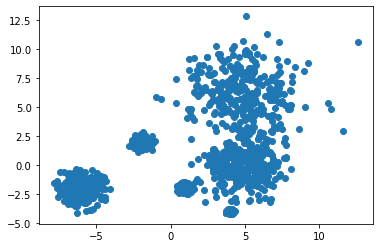

In [25]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1])

In [26]:
clf = SpectralClustering(n_clusters=6).fit(X_stretched)

In [27]:
clf.labels_

array([3, 3, 3, ..., 2, 0, 2], dtype=int32)

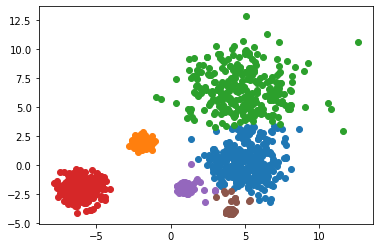

In [28]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]
X_4 = X_stretched[clf.labels_==4]
X_5 = X_stretched[clf.labels_==5]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])
plt.scatter(X_4[:, 0], X_4[:, 1])
plt.scatter(X_5[:, 0], X_5[:, 1])

## metrics by variant

### homogeneity

In [29]:
homogeneity_score(y_true, clf.labels_)

0.9441763623498763

### completeness

In [30]:
completeness_score(y_true, clf.labels_)

0.9447798474679701

### v-measure

In [31]:
v_measure_score(y_true, clf.labels_)

0.9444780085079886

## Alternative model 1 (changing affinity parameter)

In [33]:
clf = SpectralClustering(n_clusters=6, affinity="nearest_neighbors").fit(X_stretched)

/usr/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


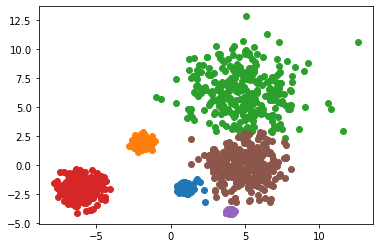

In [35]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]
X_4 = X_stretched[clf.labels_==4]
X_5 = X_stretched[clf.labels_==5]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])
plt.scatter(X_4[:, 0], X_4[:, 1])
plt.scatter(X_5[:, 0], X_5[:, 1])

In [36]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.9663927217268654, 0.9664317960207763, 0.9664122584788548)

## Alternative model 2 (adding more clusters)

In [38]:
clf = SpectralClustering(n_clusters=8).fit(X_stretched)

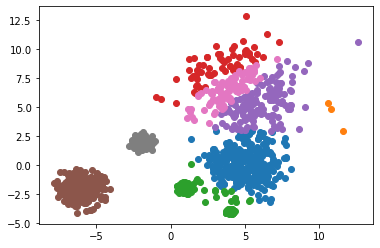

In [39]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]
X_4 = X_stretched[clf.labels_==4]
X_5 = X_stretched[clf.labels_==5]
X_6 = X_stretched[clf.labels_==6]
X_7 = X_stretched[clf.labels_==7]


plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])
plt.scatter(X_4[:, 0], X_4[:, 1])
plt.scatter(X_5[:, 0], X_5[:, 1])
plt.scatter(X_6[:, 0], X_6[:, 1])
plt.scatter(X_7[:, 0], X_7[:, 1])

In [47]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.478444548996856, 0.9837871026589676, 0.6437934455974733)

## Alternative model 3 (less clusters with nearestt neighbours affinity)

In [48]:
clf = SpectralClustering(n_clusters=3, affinity="nearest_neighbors").fit(X_stretched)

/usr/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


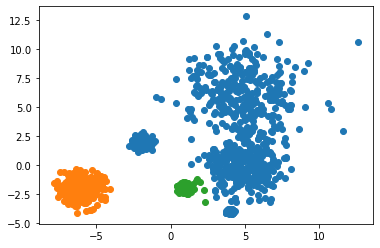

In [42]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])

In [43]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.478444548996856, 0.9837871026589676, 0.6437934455974733)

# Чи є розбиття стабiльним на пiдвибiрках даних?

In [49]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_stretched, y_true, test_size=0.6)

In [50]:
clf = SpectralClustering(n_clusters=6).fit(X_train)

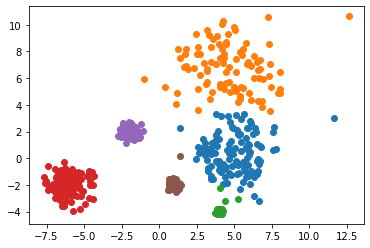

In [51]:
X_0 = X_train[clf.labels_==0]
X_1 = X_train[clf.labels_==1]
X_2 = X_train[clf.labels_==2]
X_3 = X_train[clf.labels_==3]
X_4 = X_train[clf.labels_==4]
X_5 = X_train[clf.labels_==5]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])
plt.scatter(X_4[:, 0], X_4[:, 1])
plt.scatter(X_5[:, 0], X_5[:, 1])

In [1]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

NameError: name 'homogeneity_completeness_v_measure' is not defined

# Стабільний відносно підвибірок